# Preprocessing Data

Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

Importing the data

In [2]:
raw_houseprice_df = pd.read_csv("train.csv")

## 1. Previewing the data

In [3]:
prep_house = raw_houseprice_df.copy()

# preview of the first five rows of the data
prep_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# previewing the last five rows
prep_house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# getting the shape of the data frame
prep_house.shape

(1460, 81)

In [6]:
# read dimensions
rows, columns = prep_house.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,460 rows and 81 columns.


In [7]:
# object type 
type(prep_house)

pandas.core.frame.DataFrame

In [8]:
# columns of the dataframe
columns = list(prep_house.columns)
columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [9]:
# getting the data types of the columns
prep_house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
# obtaining column names, non-null counts and datatypes 
prep_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# counting values of the datatypes
prep_house.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [12]:
# index type
prep_house.index

RangeIndex(start=0, stop=1460, step=1)

In [13]:
# True/False if column is unique on the Ids.
unique = prep_house["Id"].is_unique
print('our unique id is truly unique: {}'.format(unique))

our unique id is truly unique: True


In [14]:
# transpose index and columns of first five rows
prep_house.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


## 2. Summary Statistics

In [15]:
# descriptive statistic for numerical columns
prep_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# descriptive statistics for non-numerical colums
prep_house.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [17]:
# get the mode of numeric columns (except = Id)
mode_df = prep_house.drop(columns=['Id'])

# mode of each numeric column
mode = mode_df.mode(numeric_only=True)

#renaming index to 'mode'
mode = mode.rename(index={0: "mode"})

mode

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
mode,20,60.0,7200,5,5,2006,1950,0.0,0,0,...,0,0,0,0,0,0,0,6,2009,140000


In [18]:
# pairwise correlation of columns, excluding NA/null values
prep_house.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


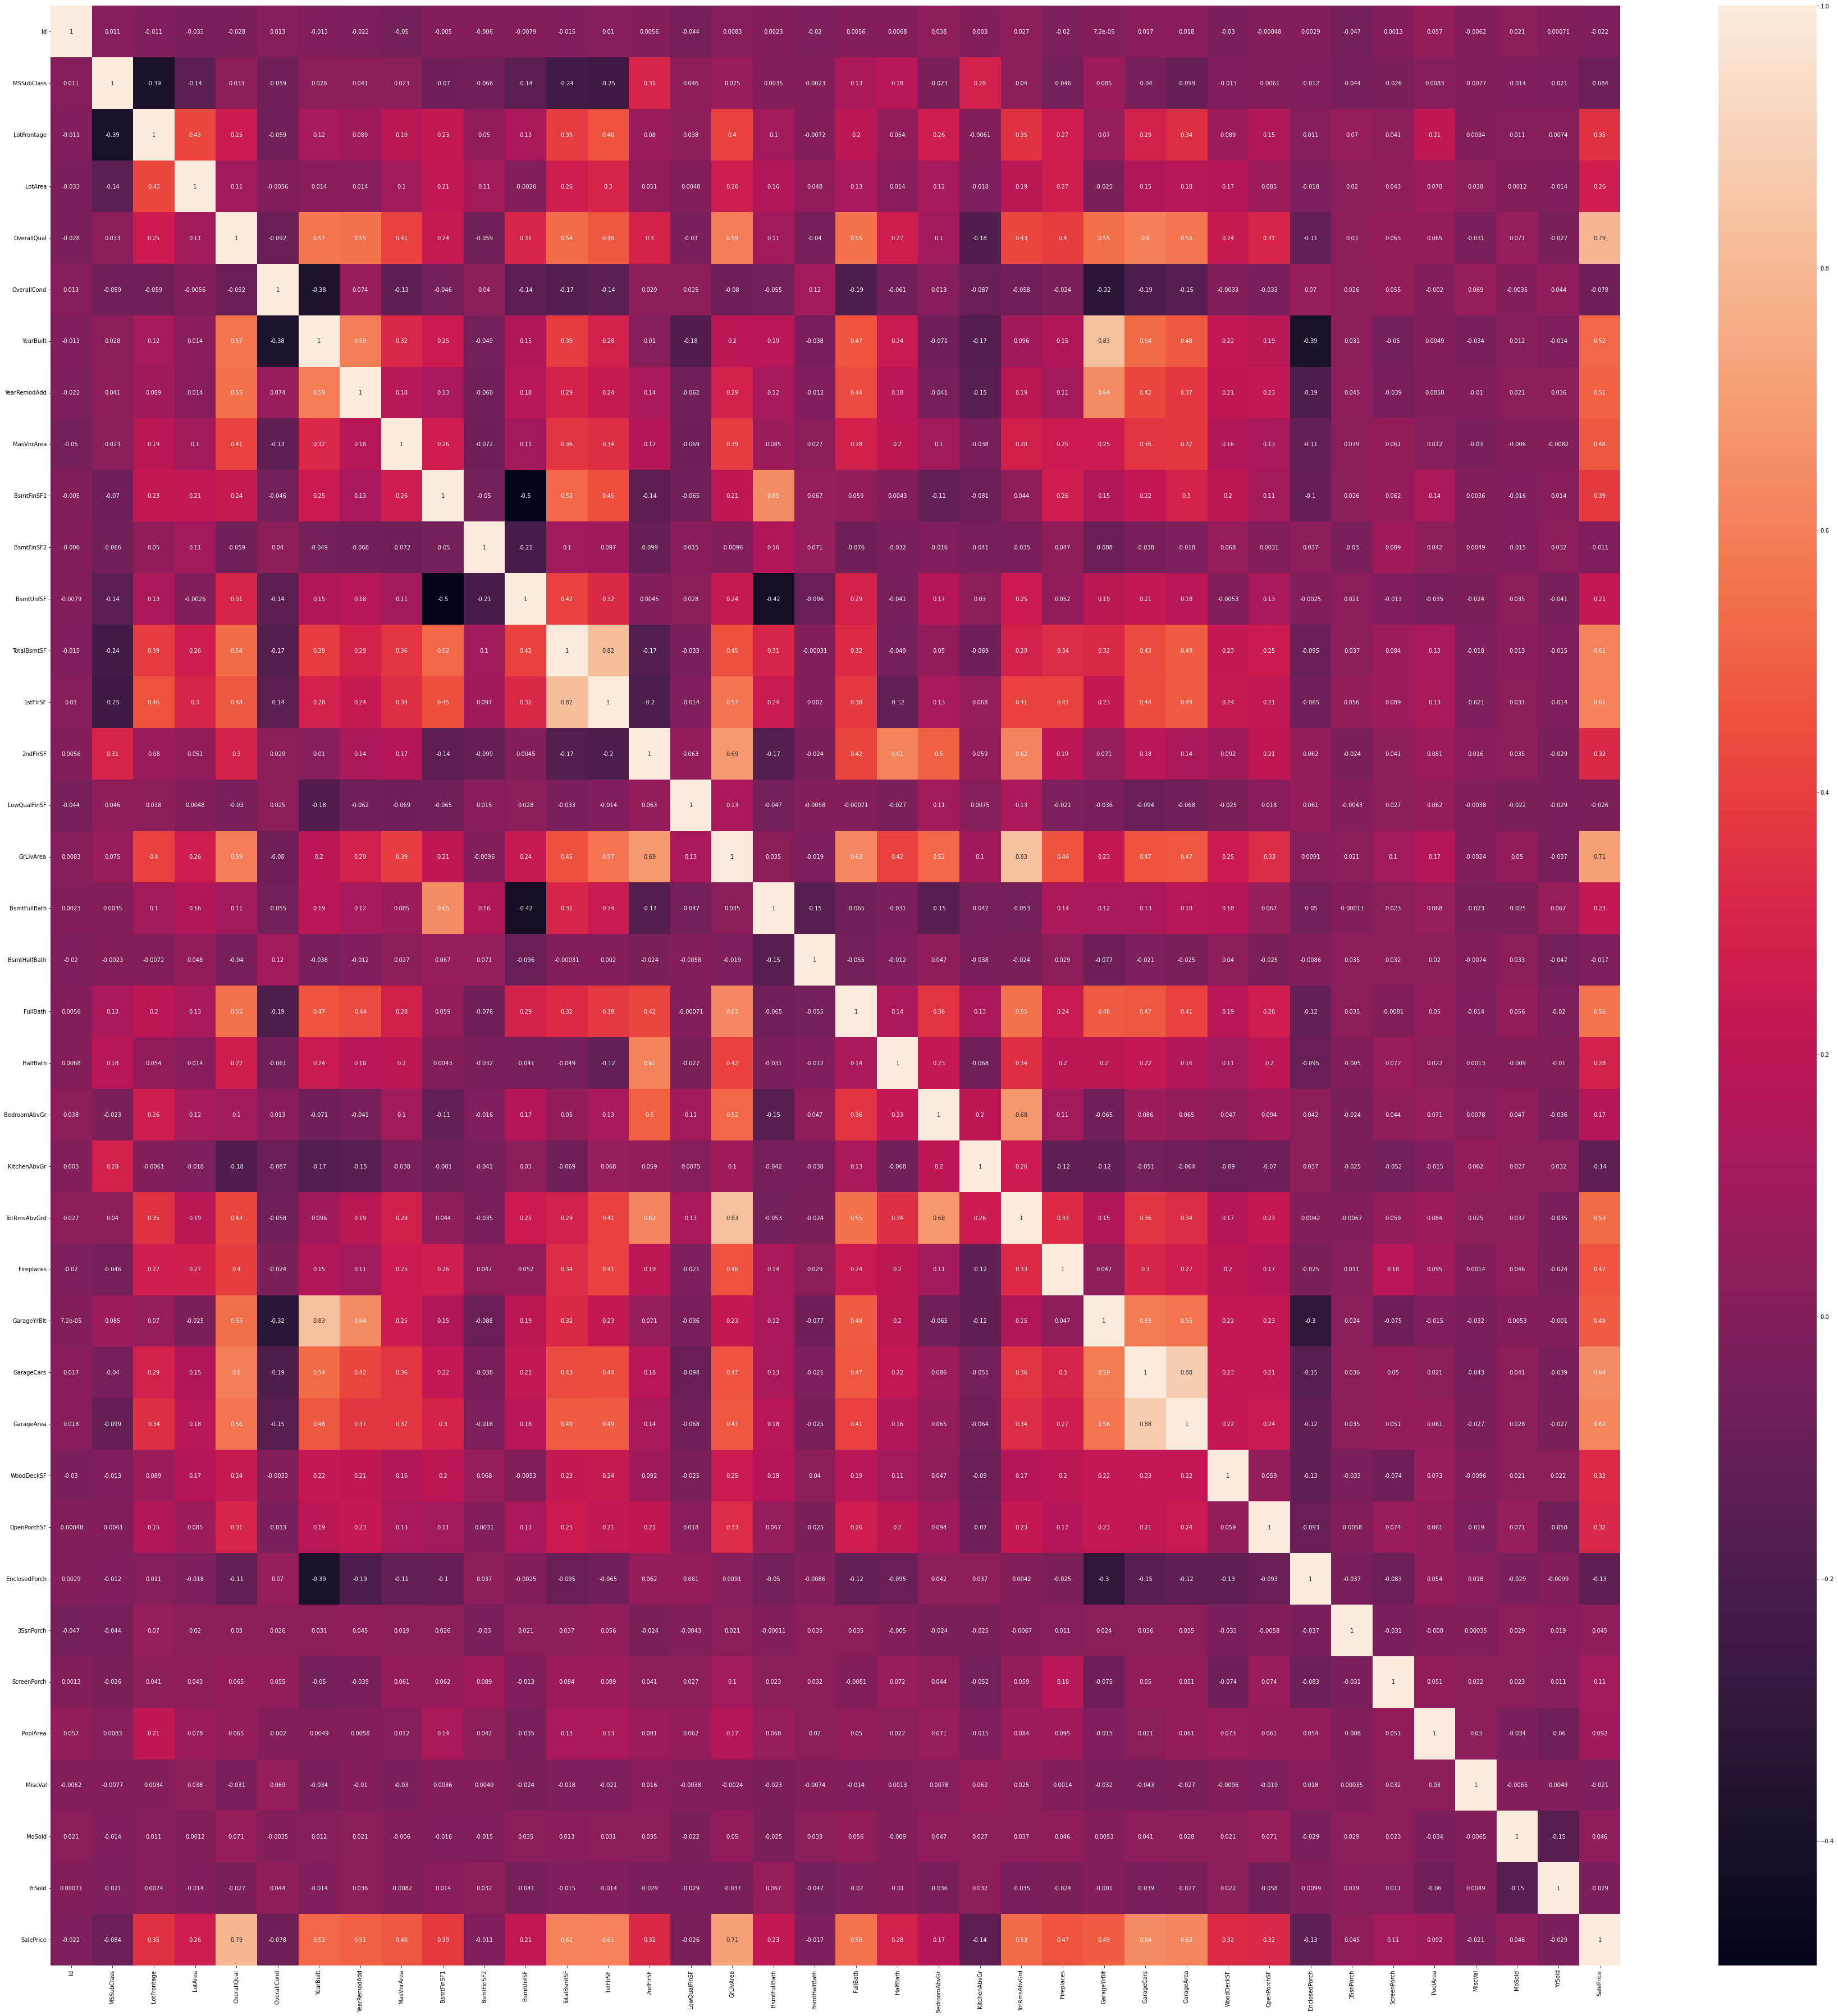

In [19]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(50,50))

sns.heatmap(prep_house.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

## 3. Identifying Null/NA Values

In [20]:
# null values per column
prep_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [21]:
# total nulls in dataframe
null_count = prep_house.isnull().sum().sum()
print("Total nulls in dataframe: {:,}".format(null_count))

Total nulls in dataframe: 6,965


In [22]:
# return T/F same-size object of nulls
prep_house.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [23]:
# return T/F if any of the values are null
prep_house.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [24]:
null_cols_ser = prep_house.isnull().any()

# locating columns by boolean 'True'
null_cols = null_cols_ser.loc[null_cols_ser].index

print('These columns have at least one null value:\n')
for col in null_cols:
    print(col)

These columns have at least one null value:

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [25]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (prep_house.isnull().sum() / len(prep_house)) * 100

# creating a dataframe
missing_data = pd.DataFrame(missing_data, columns=['perc_missing']) 
missing_data = missing_data.sort_values(by='perc_missing', ascending=False)

missing_data

,perc_missing
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
...,...
ExterQual,0.000000
Exterior2nd,0.000000
Exterior1st,0.000000
RoofMatl,0.000000


## 4. Data Cleaning & Wrangling

#### LotFrontage:
Linear feet of street connected to property
= I decided to feel out the missing values with the mean, after doing it the describe statistics didn't change too much.

In [26]:
# printing the object's type of a column
type(prep_house['LotFrontage'])

pandas.core.series.Series

In [27]:
# notice the difference of type from dataframe to series
print(type(prep_house["LotFrontage"]))
print(type(prep_house[["LotFrontage"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
# getting a serie of the LotFrontage column
prep_house['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [29]:
# getting a df
prep_house[['LotFrontage']]

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
...,...
1455,62.0
1456,85.0
1457,66.0
1458,68.0


In [30]:
# first five rows sorted by "LotFrontage" in ascending order
prep_house.sort_values('LotFrontage').head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
232,233,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,94500
837,838,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,100000
235,236,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,89500
1029,1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,118000
1038,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000


In [31]:
# first five rows sorted by "LotFrontage" in descending order
prep_house.sort_values('LotFrontage', ascending=False).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1127,1128,20,RL,182.0,14572,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Family,259000
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [32]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.
# reset index for readability.

df = prep_house['LotFrontage'].describe().reset_index()
df = df.rename(columns={'index': "statistic"})

df

,statistic,LotFrontage
0,count,1201.000000
1,mean,70.049958
2,std,24.284752
3,min,21.000000
4,25%,59.000000
5,50%,69.000000
6,75%,80.000000
7,max,313.000000


In [33]:
# printing the mode of the column LotFrontage
mode = prep_house[['LotFrontage']].mode()
mode = mode.rename({0: "mode"})

mode

,LotFrontage
mode,60.0


In [34]:
# detecting the nulls
prep_house['LotFrontage'].isnull().values.any()

True

In [35]:
# sum of all null values
prep_house['LotFrontage'].isnull().sum()

259

In [36]:
# sum of all not null values
prep_house['LotFrontage'].notnull().sum()

1201

In [37]:
# percent of null values in the column
nulls_sum = prep_house['LotFrontage'].isna().sum() 
nulls_perc = round(nulls_sum / len(prep_house) * 100, 2)

print('Percent nulls: {}%'.format(nulls_perc))

Percent nulls: 17.74%


In [38]:
# percent of not nulls
nonnulls_sum = prep_house['LotFrontage'].notnull().sum() 
nonnulls_perc = round(nonnulls_sum / len(prep_house) * 100, 2)

print('percent nulls: {}%'.format(nonnulls_perc))

percent nulls: 82.26%


### Exploring distribution of values

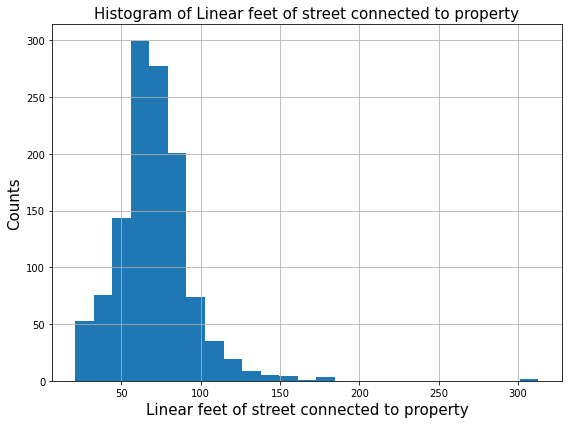

In [39]:
# making a histogram of our 'LotFrontage' column with 25 bins
prep_house['LotFrontage'].hist(figsize=(8, 6), bins=25)

# adding labels
plt.xlabel('Linear feet of street connected to property', fontsize=15)
plt.ylabel('Counts', fontsize=15) 
plt.title('Histogram of Linear feet of street connected to property', fontsize=15) 

plt.tight_layout()

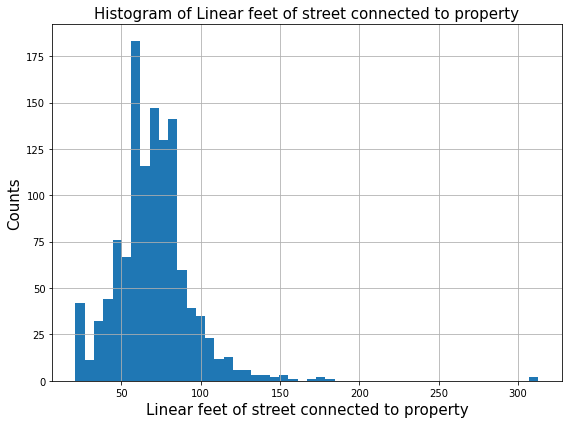

In [40]:
# making a histogram of our 'LotFrontage' column with 50 bins
prep_house['LotFrontage'].hist(figsize=(8, 6), bins=50)

# adding labels
plt.xlabel('Linear feet of street connected to property', fontsize=15)
plt.ylabel('Counts', fontsize=15) 
plt.title('Histogram of Linear feet of street connected to property', fontsize=15) 

plt.tight_layout()

In [41]:
# printing skewness and kurtosis
print("Skewness: {:.3f}".format(prep_house['LotFrontage'].skew()))
print("Kurtosis: {:.3f}".format(prep_house['LotFrontage'].kurt()))

Skewness: 2.164
Kurtosis: 17.453


In [42]:
# prints the counts of values the column in descending order
prep_house['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [43]:
# counts of values sorted by the index ascending order
prep_house['LotFrontage'].value_counts().sort_index()

21.0     23
24.0     19
30.0      6
32.0      5
33.0      1
         ..
160.0     1
168.0     1
174.0     2
182.0     1
313.0     2
Name: LotFrontage, Length: 110, dtype: int64

In [44]:
# value counts of the first ten rows sorted by the index ascending order
prep_house['LotFrontage'].value_counts().sort_index(ascending=True).head(10)

21.0    23
24.0    19
30.0     6
32.0     5
33.0     1
34.0    10
35.0     9
36.0     6
37.0     5
38.0     1
Name: LotFrontage, dtype: int64

In [45]:
# value counts of the first ten rows sorted by the index descending order
prep_house['LotFrontage'].value_counts().sort_index(ascending=False).head(10)

313.0    2
182.0    1
174.0    2
168.0    1
160.0    1
153.0    1
152.0    1
150.0    1
149.0    1
144.0    1
Name: LotFrontage, dtype: int64

### Making a box plot

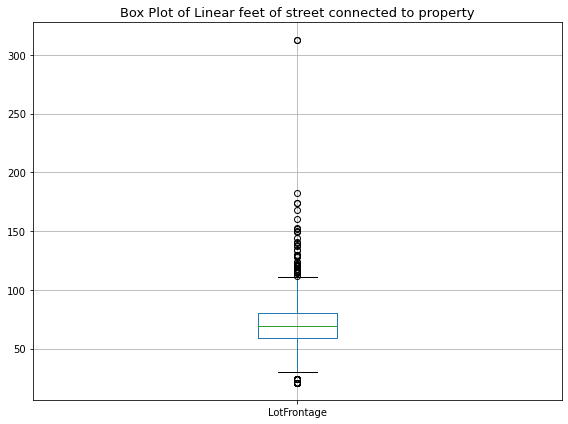

In [46]:
# making a box plot from LotFrontage column
prep_house.boxplot(column=['LotFrontage'], figsize=(8,6))
plt.title('Box Plot of Linear feet of street connected to property', fontsize=13)

plt.tight_layout()

### Calculating Interquartile Range (IQR)

In [47]:
# printing the 25% and 75% quantiles for column
print(prep_house['LotFrontage'].quantile(0.25))
print(prep_house['LotFrontage'].quantile(0.75))

59.0
80.0


In [48]:
# saving the 25% (i.e. Q1) and 75% (i.e. Q3) quantiles of our 'CNSTRCT_YR' column
Q1 = prep_house['LotFrontage'].quantile(0.25)
Q3 = prep_house['LotFrontage'].quantile(0.75)

# Computing the interquartile range (IQR)
IQR = Q3 - Q1

# printing the IQR of our 'CNSTRCT_YR' column
IQR

21.0

In [49]:
# printing the lower 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q1 - 1.5 * IQR))

# printing the upper 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q3 + 1.5 * IQR))

27.5
111.5


### Filling Null/NA with median

In [50]:
counts = prep_house['LotFrontage'].isnull().sum()
print('Number of nulls fo LotFrontage: {:,}'.format(counts))

Number of nulls fo LotFrontage: 259


In [51]:
median = prep_house["LotFrontage"].median()
print("Median value of LotFrontage: {}".format(median))

Median value of LotFrontage: 69.0


In [52]:
# saving the median of LotFrontage as the name 'median'
median = prep_house["LotFrontage"].median()

# filling na values in LotFrontage column with the column's median value
prep_house["LotFrontage"] = prep_house["LotFrontage"].fillna(value=median)
prep_house["LotFrontage"].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [53]:
counts = prep_house['LotFrontage'].isnull().sum()
print('Number of nulls of LotFrontage: {:,}'.format(counts))

Number of nulls of LotFrontage: 0


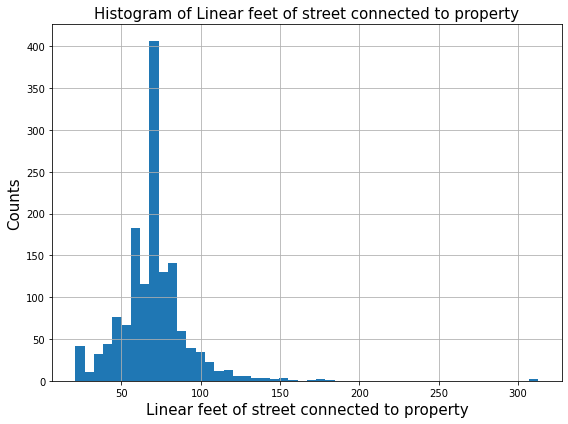

In [54]:
# making a histogram of LotFrontage column with 10 bins
prep_house['LotFrontage'].hist(bins=50, figsize=(8, 6))

plt.xlabel('Linear feet of street connected to property', fontsize=15)
plt.ylabel('Counts', fontsize=15) 
plt.title('Histogram of Linear feet of street connected to property', fontsize=15) 

plt.tight_layout()

#### Alley:
Type of alley access to property

In [55]:
type(prep_house['Alley'])

pandas.core.series.Series

In [56]:
prep_house['Alley']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1460, dtype: object

In [57]:
prep_house.sort_values('Alley').head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
844,845,50,RM,100.0,12665,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,153900
505,506,90,RM,60.0,7596,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,COD,Normal,124500
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,106250
1192,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000


In [58]:
df = prep_house['Alley'].describe().reset_index()
df = df.rename(columns={'index': "statistic"})

df

,statistic,Alley
0,count,91
1,unique,2
2,top,Grvl
3,freq,50


In [59]:
mode = prep_house[['Alley']].mode()
mode = mode.rename({0: "mode"})

mode

,Alley
mode,Grvl


In [60]:
prep_house['Alley'].isnull().values.any()

True

In [61]:
prep_house['Alley'].isnull().sum()

1369

In [62]:
prep_house['Alley'].notnull().sum()

91

In [63]:
# percent of null values in the column
nulls_sum = prep_house['Alley'].isna().sum() 
nulls_perc = round(nulls_sum / len(prep_house) * 100, 2)

print('Percent nulls: {}%'.format(nulls_perc))

Percent nulls: 93.77%


In [64]:
# percent of not nulls
nonnulls_sum = prep_house['Alley'].notnull().sum() 
nonnulls_perc = round(nonnulls_sum / len(prep_house) * 100, 2)

print('percent nulls: {}%'.format(nonnulls_perc))

percent nulls: 6.23%


In [65]:
#The no alley access (NA) was save as a null value, so I just change it to "NA"
prep_house["Alley"] = prep_house["Alley"].fillna("NA")

In [66]:
# Counting values for categories in Alley
categories_alley = prep_house.groupby(by='Alley').size()
categories_alley

Alley
Grvl      50
NA      1369
Pave      41
dtype: int64

<AxesSubplot:xlabel='Alley'>

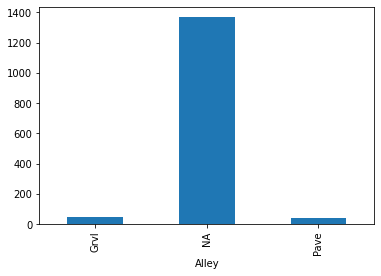

In [67]:
%matplotlib inline
categories_alley.plot.bar()

#### MasVnrType & MasVnrArea:

Masonry veneer type & Masonry veneer area in square feet

Because the rows with missing values are the same. I assume the houses doesn't have a Masonry, so upload to the "None" option. For MasVnrArea, upload to zero.


In [68]:
df = prep_house['MasVnrType'].describe().reset_index()
df = df.rename(columns={'index': "statistic"})

df

,statistic,MasVnrType
0,count,1452
1,unique,4
2,top,None
3,freq,864


In [69]:
df = prep_house['MasVnrArea'].describe().reset_index()
df = df.rename(columns={'index': "statistic"})

df

,statistic,MasVnrArea
0,count,1452.000000
1,mean,103.685262
2,std,181.066207
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,166.000000
7,max,1600.000000


In [70]:
prep_house["MasVnrType"] = prep_house["MasVnrType"].fillna("None")
prep_house["MasVnrArea"] = prep_house["MasVnrArea"].fillna(0)

<AxesSubplot:xlabel='MasVnrType'>

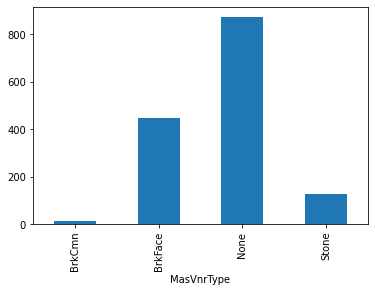

In [71]:
categories_MasVnrType = prep_house.groupby(by='MasVnrType').size()
categories_MasVnrType
%matplotlib inline
categories_MasVnrType.plot.bar()

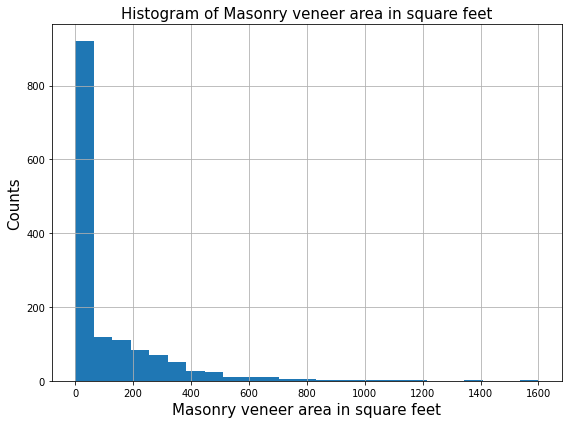

In [72]:
# making a histogram of our 'MasVnrArea' column with 25 bins
prep_house['MasVnrArea'].hist(figsize=(8, 6), bins=25)

# adding labels
plt.xlabel('Masonry veneer area in square feet', fontsize=15)
plt.ylabel('Counts', fontsize=15) 
plt.title('Histogram of Masonry veneer area in square feet', fontsize=15) 

plt.tight_layout()

#### Basement

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 The values are null when there is no basement, so I update to the option "NA" -> No Basement


In [73]:
prep_house["BsmtQual"] = prep_house["BsmtQual"].fillna("NA")
prep_house["BsmtCond"] = prep_house["BsmtCond"].fillna("NA")
prep_house["BsmtExposure"] = prep_house["BsmtExposure"].fillna("NA")
prep_house["BsmtFinType1"] = prep_house["BsmtFinType1"].fillna("NA")
prep_house["BsmtFinType2"] = prep_house["BsmtFinType2"].fillna("NA")

#### Electrical

In [74]:
df = prep_house['Electrical'].describe().reset_index()
df = df.rename(columns={'index': "statistic"})

df

,statistic,Electrical
0,count,1459
1,unique,5
2,top,SBrkr
3,freq,1334


In [75]:
prep_house['Electrical'].isnull().values.any()

True

In [76]:
prep_house['Electrical'].isnull().sum()

1

<AxesSubplot:xlabel='Electrical'>

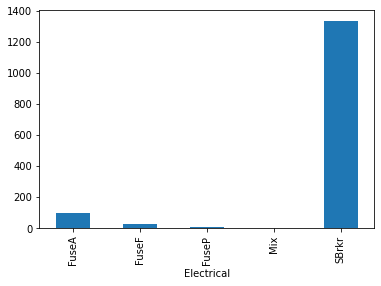

In [77]:
categories_Electrical = prep_house.groupby(by='Electrical').size()
categories_Electrical
%matplotlib inline
categories_Electrical.plot.bar()

In [78]:
prep_house = prep_house.dropna(subset=["Electrical"])

#### Fireplaces
No fireplace option is presented as null value, so I updated to NA

In [79]:
prep_house['FireplaceQu'].isnull().values.any()

True

In [80]:
prep_house["FireplaceQu"] = prep_house["FireplaceQu"].fillna("NA")

<AxesSubplot:xlabel='FireplaceQu'>

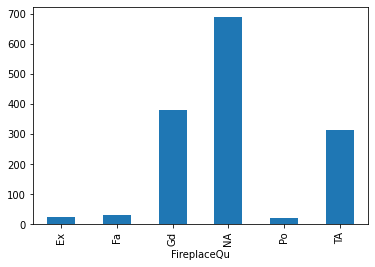

In [81]:
categories_FireplaceQu = prep_house.groupby(by='FireplaceQu').size()
categories_FireplaceQu
%matplotlib inline
categories_FireplaceQu.plot.bar()

In [82]:
prep_house["GarageType"] = prep_house["GarageType"].fillna("NA")
prep_house["GarageFinish"] = prep_house["GarageFinish"].fillna("NA")
prep_house["GarageQual"] = prep_house["GarageQual"].fillna("NA")
prep_house["GarageCond"] = prep_house["GarageCond"].fillna("NA")
prep_house["GarageYrBlt"] = prep_house["GarageYrBlt"].fillna(0)

In [83]:
prep_house["PoolQC"] = prep_house["PoolQC"].fillna("NA")
prep_house["Fence"] = prep_house["Fence"].fillna("NA")
prep_house["MiscFeature"] = prep_house["MiscFeature"].fillna("NA")

In [84]:
prep_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [85]:
prep_house.shape

(1459, 81)

In [87]:
prep_house.to_csv("house_data_preprocessed")